In [6]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [2]:
#jsonline reader function
def jl_reader(input_file):
    with open(input_file) as f:
        lines = f.read().splitlines()
    
    intermediate_df = pd.DataFrame(lines)
    intermediate_df.columns = ['json_element']
    intermediate_df['json_element'].apply(json.loads)
    final_df = pd.json_normalize(intermediate_df['json_element'].apply(json.loads))
    return final_df

In [8]:
arma_3 = jl_reader('data/Arma_3.jsonlines')
csgo = jl_reader('data/Counter_Strike_Global_Offensive.jsonlines')
cs = jl_reader('data/Counter_Strike.jsonlines')
dota_2 = jl_reader('data/Dota_2.jsonlines')
fm = jl_reader('data/Football_Manager_2015.jsonlines')
garrysmod = jl_reader('data/Garrys_Mod.jsonlines')
gta = jl_reader('data/Grand_Theft_Auto_V.jsonlines')
civ5 = jl_reader('data/Sid_Meiers_Civilization_5.jsonlines')
tf2 = jl_reader('data/Team_Fortress_2.jsonlines')
es5 = jl_reader('data/The_Elder_Scrolls_V.jsonlines')
wf = jl_reader('data/Warframe.jsonlines')

In [18]:
dataframes_list = [arma_3, csgo, cs, dota_2, fm, garrysmod, gta, civ5, tf2, es5, wf]
game_names = ['Arma 3', 'CSGO', 'CS', 'Dota 2', 'Football Manager', 'Garrys mod', 'GTA', 'CIV5', 'TF2', 'Elderscrolls', 'Warframe']

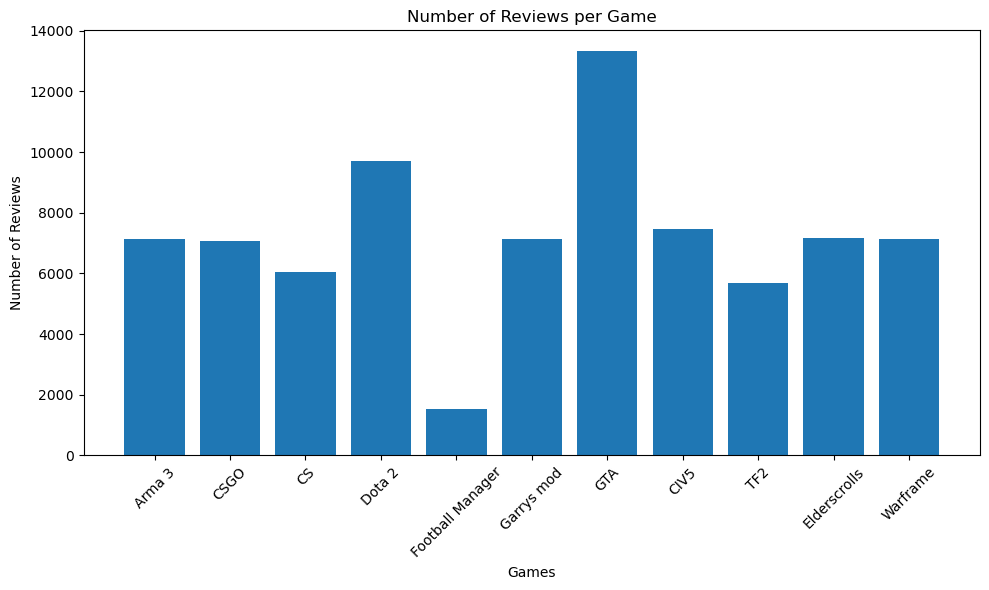

In [19]:
# Plot of the number of reviews per game
review_count = [len(df) for df in dataframes_list]
plt.figure(figsize=(10,6))
plt.bar(game_names, review_count)
plt.title('Number of Reviews per Game')
plt.xlabel('Games')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
plt.tight_layout()
plt.show()

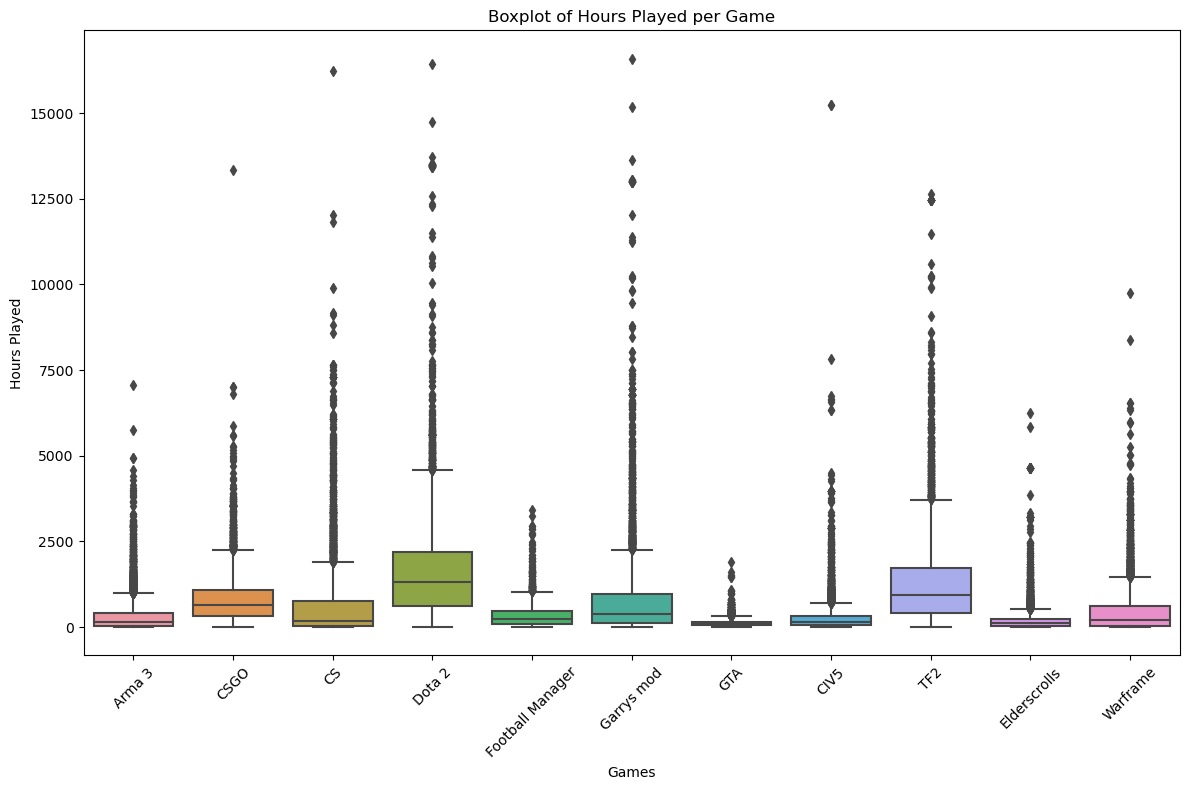

In [24]:
# Plotting hours played boxplot
hours_df = pd.DataFrame()

for game, game_name in zip(dataframes_list, game_names):
    hours_df[game_name] = game['total_game_hours']

plt.figure(figsize=(12, 8))
sns.boxplot(data=hours_df)
plt.title('Boxplot of Hours Played per Game')
plt.xlabel('Games')
plt.ylabel('Hours Played')
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
plt.tight_layout()
plt.show()

In [35]:
quantiles_df = pd.DataFrame(index=['25th Percentile', '50th Percentile', '75th Percentile'])
index_map = {0.25: '25th Percentile', 0.5: '50th Percentile', 0.75: '75th Percentile'}

# Populate the quantiles_df
for game_df, game_name in zip(dataframes_list, game_names):
    game_df['total_game_hours'] = game_df['total_game_hours'].dropna()
    quantiles = game_df['total_game_hours'].quantile([0.25, 0.5, 0.75])
    quantiles = quantiles.rename(index=index_map)
    quantiles_df[game_name] = quantiles

print(quantiles_df)

                 Arma 3    CSGO       CS    Dota 2  Football Manager  Garrys mod    GTA   CIV5       TF2  Elderscrolls  Warframe
25th Percentile   36.00   319.9   19.975   569.450             82.90       113.5   42.4   66.0   400.025          37.6      30.4
50th Percentile  138.70   639.2  177.700  1245.900            222.10       370.7   83.5  154.4   934.000         106.0     202.3
75th Percentile  414.95  1090.8  768.675  2118.125            461.55       971.4  149.5  319.9  1729.200         235.0     601.3


In [39]:
# Calculating recommended percentage per game
recommended_percentages = []

# Calculate recommended percentage for each game
for game_df in dataframes_list:
    total_reviews = len(game_df)
    recommended_count = game_df[game_df['rating'] == 'Recommended'].shape[0]
    recommended_percentage = (recommended_count / total_reviews) * 100
    recommended_percentages.append(recommended_percentage)

# Create a DataFrame to display results
result_df = pd.DataFrame({
    'Game': game_names,
    'Recommended Percentage': recommended_percentages
})

print(result_df)

                Game  Recommended Percentage
0             Arma 3               84.225982
1               CSGO               95.631274
2                 CS               96.754967
3             Dota 2               94.269547
4   Football Manager               67.608410
5         Garrys mod               99.035100
6                GTA               64.521687
7               CIV5               99.986608
8                TF2               98.291050
9       Elderscrolls               49.043964
10          Warframe               88.558192


In [44]:
all_df = pd.concat(dataframes_list, ignore_index=True)

In [55]:
len(all_df)

79437